# **Classification of 10 categories of Animal images**
The Dataset has been taken from [Animal10](https://www.kaggle.com/alessiocorrado99/animals10). It contains about 28K medium quality animal images belonging to 10 categories. All the images in data set were collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions.

> 1. <a href='#step1'>Loading and Exploring Data</a>
     *  1.1.  <a href='#step1.1'>Loading Libraries</a>  
     *  1.2.  <a href='#step1.2'>Extracting Train Data</a>
     *  1.3.  <a href='#step1.3'>Shuffling input and target for optimum training</a>    
>2. <a href='#step2'>Image Preprocessing</a>
     *  2.1. <a href='#step2.1'>Function for Resizing and Reshaping the input images </a>     
     *  2.2. <a href='#step2.2'>Image Resizing and converting them to array</a>
     *  2.3  <a href='#step2.3'>Viewing Images after preprocessing</a>
     * 2.4.  <a href='#step2.4'>Re-Shuffling processed data and converting to array</a>
     * 2.5.  <a href='#step2.5'>Train test split,OneHotVectorizing categories, Input normalization</a>              
     * 2.6.  <a href='#step2.6'>Renaming Animals</a>
     * 2.7.  <a href='#step2.7'>Data Augmentation for training</a>
     * 2.8.  <a href='#step2.8'>Preprocessing Test data</a>
     
> 3. <a href='#step3.1'>Creating CNN Models with Transfer Learning </a>
     * 3.1 <a href='#step3.1'>CNN using VGG-16 Model </a>
     * 3.2 <a href='#step3.2'>CNN using ResNet50 Model</a>
     * 3.5 <a href='#step3.3'>Training Models </a>
     * 3.6 <a href='#step3.4'>Plotting Loss and Accuracy Curves</a>
> 4. <a href='#step4'>Predicting Categories for Test data</a>
     * 4.1 <a href='#step4.1'>Viewing Predictions</a>


<a id='step1.1'></a>

Explanation for Libraries :
* > OpenCV(cv2) function for reading image. CV2 reads order of colors as BGR. In PIL, colors order is assumed as RGB .
* > TQDM is a progress bar library. Inserting tqdm (or python -m tqdm)between pipes will pass through all stdin to stdout while printing progress to stderr
* > In Utils module, "class_weight" parameter penalizes mistakes in samples of class[i] and  "Shuffle" parameter for shuffling arrays or sparse matrices in a consistent way
* > "categorical" parameter is used to convert array of labeled data to one-hot vector and "applications" can be used for prediction, feature extraction
* >  "Dropout" is used to prevent a model from overfitting. "Flatten" is used to preserve weight ordering when switching from one data format to another data format. Dense layer is the regular deeply connected neural network layer

<a id='step1.1'></a>
1.2.  Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from tqdm import tqdm_notebook as tqdm
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from keras.utils import to_categorical
from keras import applications, optimizers

from keras.models import Sequential, Model, load_model,clone_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.layers import BatchNormalization
from keras.layers import Dropout

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from tqdm import tqdm_notebook as tqdm
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from keras.utils import to_categorical
from keras import applications, optimizers

from keras.models import Sequential, Model, load_model,clone_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy

# Use tf.keras.preprocessing.image for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.layers import BatchNormalization
from keras.layers import Dropout

<a id='step1.2'></a>
1.2.  Extracting Train Data

In [3]:
!pip install kaggle


In [9]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vartikar2512","key":"fad74927841087160e3c22e478f79f32"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d alessiocorrado99/animals10


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 582M/586M [00:04<00:00, 138MB/s]
100% 586M/586M [00:04<00:00, 139MB/s]


In [12]:
!unzip animals10.zip


Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [13]:
foldernames = os.listdir("/kaggle/input/animals10/raw-img")
categories = []      # list of all categories of animals present
files = []           # list of all images from all categories

for k, folder in enumerate(foldernames):
    filenames = os.listdir("../input/animals10/raw-img/" + folder);
    for file in filenames:
        files.append("../input/animals10/raw-img/" + folder + "/" + file)
        categories.append(k)
# creating a dataframe of images and their respective categories
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

#initializing empty train df
train_df = pd.DataFrame(columns=['filename', 'category'])

#collecting 500 samples from each of 10 categories
i = 0
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

print(train_df.head())
train_df = train_df.reset_index(drop=True) # reset index of a Data Frame
train_df

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/animals10/raw-img'

In [14]:
import os
import pandas as pd

# List all folder names (categories) inside the 'raw-img' directory
foldernames = os.listdir("/content/raw-img")
categories = []      # List of all categories of animals present
files = []           # List of all images from all categories

# Iterate through the folder names
for k, folder in enumerate(foldernames):
    filenames = os.listdir("/content/raw-img/" + folder)  # Adjust path to match the unzipped location
    for file in filenames:
        files.append("/content/raw-img/" + folder + "/" + file)
        categories.append(k)

# Creating a DataFrame of images and their respective categories
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

# Initializing empty train DataFrame
train_df = pd.DataFrame(columns=['filename', 'category'])

# Collecting 500 samples from each of the 10 categories
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500, :])

print(train_df.head())
train_df = train_df.reset_index(drop=True)  # Reset index of DataFrame
train_df


AttributeError: 'DataFrame' object has no attribute 'append'

In [15]:
import os
import pandas as pd

# List all folder names (categories) inside the 'raw-img' directory
foldernames = os.listdir("/content/raw-img")
categories = []      # List of all categories of animals present
files = []           # List of all images from all categories

# Iterate through the folder names
for k, folder in enumerate(foldernames):
    filenames = os.listdir("/content/raw-img/" + folder)  # Adjust path to match the unzipped location
    for file in filenames:
        files.append("/content/raw-img/" + folder + "/" + file)
        categories.append(k)

# Creating a DataFrame of images and their respective categories
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

# Initializing empty train DataFrame
train_df = pd.DataFrame(columns=['filename', 'category'])

# Collecting 500 samples from each of the 10 categories
for i in range(10):
    category_df = df[df.category == i]

    # Check if there are at least 500 samples in the category
    if len(category_df) >= 500:
        train_df = pd.concat([train_df, category_df.iloc[:500, :]])
    else:
        print(f"Category {i} has less than 500 images. Only {len(category_df)} samples are available.")

# Reset index of DataFrame after appending
train_df = train_df.reset_index(drop=True)

# Print the head of the train DataFrame
print(train_df.head())


                                            filename category
0  /content/raw-img/cavallo/OIP-0JLO8VYnLu2hNwkG7...        0
1  /content/raw-img/cavallo/OIP-r1hFoye22dDG6huHh...        0
2  /content/raw-img/cavallo/OIP-XsKQMewVQ0c896IUV...        0
3  /content/raw-img/cavallo/OIP-24saFJAfLkRoz4vMQ...        0
4  /content/raw-img/cavallo/OIP-pBo0QRT7aQ2YOKtXi...        0


<a id='step1.3'></a>
1.3. Shuffling input and target for optimum training

In [16]:
y = train_df['category']
x = train_df['filename']

x, y = shuffle(x, y, random_state=8)

<a id='step2'></a>
<a id='step2.1'></a>
* 2.1. Function for Resizing and Reshaping the input images

In [17]:
def centering_image(img):
    size = [256,256]

#shape:(h×w×t)taking the first2 elements(h,w) and unpacking them appropriately
    img_size = img.shape[:2]

    # extracting the excess space for centering.
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2

#creating centered image by taking a 0-matrix and then re-assigning intensities
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized


<a id='step2.2'></a>
2.2. Image Resizing and converting them to array

In [18]:
images = []

with tqdm(total=len(train_df)) as k:
    for i, file_path in enumerate(train_df.filename.values):

        #color order is changed
        img = cv2.imread(file_path)
        #resnet docs
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #converting images to square
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering the images
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #output 224*224px
        img = img[16:240, 16:240]
        images.append(img)
        k.update(1)

images = np.array(images)

<ipython-input-18-e17764e2943a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(train_df)) as k:


  0%|          | 0/5000 [00:00<?, ?it/s]

<a id='step2.3'></a>
2.3. Viewing Images after preprocessing

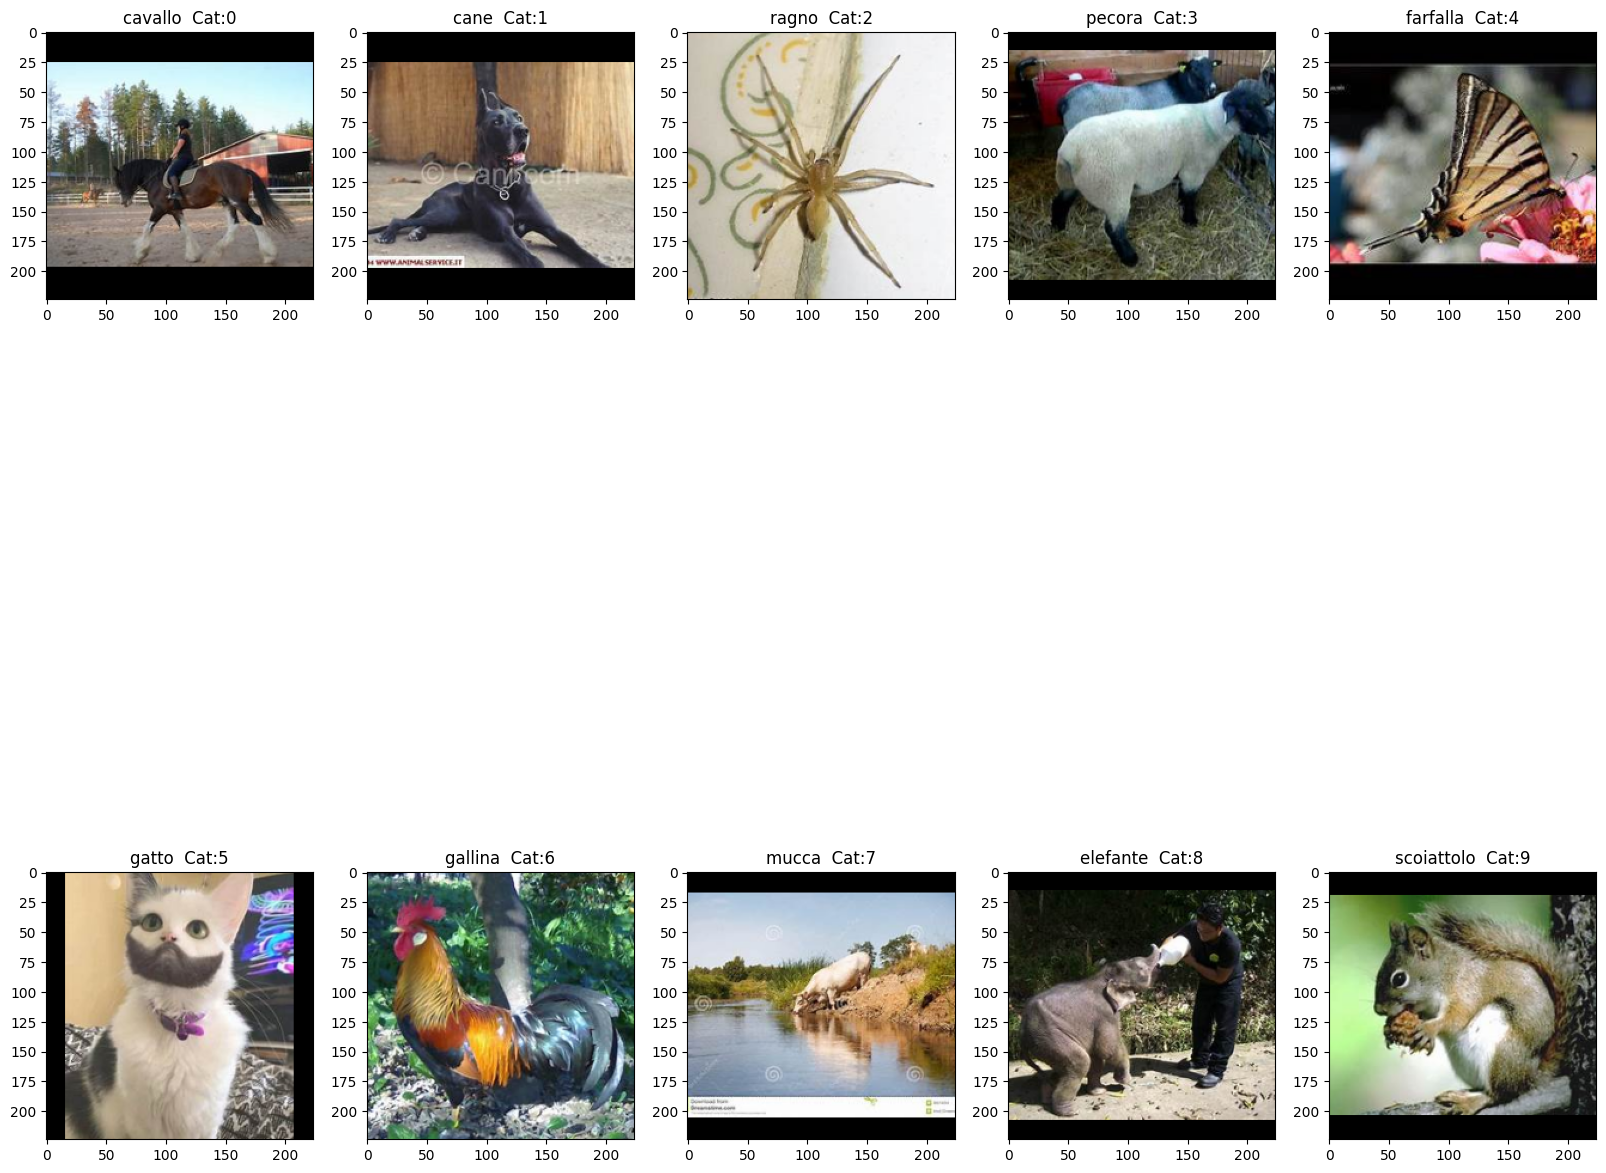

In [19]:
cols=5
fig, ax = plt.subplots(2,5, figsize=(20,20))
for i in range(10):
    path = train_df[train_df.category == i].values[1] #takes path in os of 1 value of figure of each category
#     print(path)
#     image = cv2.imread(path[0])  #     [i//cols, i%cols]
    ax[i//cols, i%cols].set_title(path[0].split('/')[-2] +' '+' Cat:'+ str(path[1])) # -2 is location of name of figure in path
    ax[i//cols, i%cols].imshow(images[train_df[train_df.filename == path[0]].index[0]])

<a id='step2.4'></a>
2.4. Re-Shuffling processed train data and converting to array

In [20]:
data_num = len(y)
random_index = np.random.permutation(data_num)

x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])

x = np.array(x_shuffle)
y = np.array(y_shuffle)

<a id='step2.5'></a>
2.5. Train val split, OneHotVectorizing categories, Input normalization

In [21]:
#train_test split
val_size = int(round(0.8*len(y)))
x_train = x[:val_size]
y_train = y[:val_size]
x_val = x[val_size:]
y_val = y[val_size:]

print('x_train Shape:', x_train.shape, '\t x_test Shape:',x_val.shape)
print('y_train Shape: ', y_train.shape, '\t y_test Shape:',y_val.shape)


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

#dividing each intensity in array by 225 ( 225 is max intensity in RGB)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

print('x_train Shape:', x_train.shape, '\t x_test Shape:',x_val.shape)
print('y_train Shape: ', y_train.shape, '\t y_test Shape:',y_val.shape)
print('image Shape:', x_train[0].shape)

x_train Shape: (4000, 224, 224, 3) 	 x_test Shape: (1000, 224, 224, 3)
y_train Shape:  (4000,) 	 y_test Shape: (1000,)
x_train Shape: (4000, 224, 224, 3) 	 x_test Shape: (1000, 224, 224, 3)
y_train Shape:  (4000, 10) 	 y_test Shape: (1000, 10)
image Shape: (224, 224, 3)


<a id='step2.6'></a>
2.6. Renaming Animals (helpful in viewing predictions)

In [22]:
animal_names = []
for i in range(10):
    path = train_df[train_df.category == i].values[1]
    if path[0].split('/')[-2] == 'scoiattolo':
        animal_names.append('squirrel')
    elif path[0].split('/')[-2] == 'cavallo':
        animal_names.append('horse')
    elif path[0].split('/')[-2] == 'farfalla':
        animal_names.append('butterfly')
    elif path[0].split('/')[-2] == 'mucca':
        animal_names.append('cow')
    elif path[0].split('/')[-2] == 'gatto':
        animal_names.append('cat')
    elif path[0].split('/')[-2] == 'pecora':
        animal_names.append('sheep')
    elif path[0].split('/')[-2] == 'gallina':
        animal_names.append('chicken')
    elif path[0].split('/')[-2] == 'elefante':
        animal_names.append('elephant')
    elif path[0].split('/')[-2] == 'ragno':
        animal_names.append('spider')
    elif path[0].split('/')[-2] == 'cane':
        animal_names.append('dog')

<a id='step2.7'></a>
2.7. ****Data Augmentation****

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

- shear_range is for randomly applying shearing transformations

- zoom_range is for randomly zooming inside pictures

- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [23]:
# ImageDataGenerator for data augmentation

train_data_gen = ImageDataGenerator(rotation_range=45,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True)
train_data_gen.fit(x_train)

<a id='step2.8'></a>
2.8. Preprocessing test data

In [24]:
test_images = []
test_df = pd.DataFrame(columns=['filename'])
actual_pred=pd.DataFrame(columns=['Category'])
for i in range(10):
    test_df = test_df.append(df[df.category == i].iloc[500:502,:1])
    actual_pred=actual_pred.append(df[df.category == i].iloc[500:502,1:])

    test_df = test_df.reset_index(drop=True)
    actual_pred = actual_pred.reset_index(drop=True)
with tqdm(total=len(test_df)) as k:
    for i, file_path in enumerate(test_df.filename.values):

        #color order is changed
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #converting images to square
        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        #centering the images
        img = centering_image(cv2.resize(img, dsize=tile_size))

        #output 224*224px
        img = img[16:240, 16:240]
        test_images.append(img)
        k.update(1)
test_images = np.array(test_images).reshape(-1,224,224,3)

AttributeError: 'DataFrame' object has no attribute 'append'

In [25]:
import os
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

test_images = []
test_df = pd.DataFrame(columns=['filename'])
actual_pred = pd.DataFrame(columns=['Category'])

# Collecting 2 samples from each of the 10 categories for testing
for i in range(10):
    test_category_df = df[df.category == i].iloc[500:502, :1]  # Only select filenames
    actual_pred_category = df[df.category == i].iloc[500:502, 1:]  # Select the categories

    # Concatenating instead of append
    test_df = pd.concat([test_df, test_category_df])
    actual_pred = pd.concat([actual_pred, actual_pred_category])

    # Reset index after concatenating
    test_df = test_df.reset_index(drop=True)
    actual_pred = actual_pred.reset_index(drop=True)

# Now process the images and create the test_images array
with tqdm(total=len(test_df)) as k:
    for i, file_path in enumerate(test_df.filename.values):

        # Read and process image
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Resize image to square
        if img.shape[0] > img.shape[1]:
            tile_size = (int(img.shape[1] * 256 / img.shape[0]), 256)
        else:
            tile_size = (256, int(img.shape[0] * 256 / img.shape[1]))

        # Centering the image
        img = centering_image(cv2.resize(img, dsize=tile_size))

        # Crop to 224x224
        img = img[16:240, 16:240]
        test_images.append(img)

        # Update progress bar
        k.update(1)

# Convert the list to numpy array and reshape
test_images = np.array(test_images).reshape(-1, 224, 224, 3)

# test_images now contains your processed image data.


100%|██████████| 20/20 [00:00<00:00, 272.04it/s]


In [28]:
 print(test_df.shape)


(20, 1)


<a id='step3.1'></a>

3.1. ****Creating a Convolutional Neural Network using VGG16****

- Paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition (ICLR 2015)](https://arxiv.org/abs/1409.1556)

- For transfer learning use cases, make sure to read the guide to transfer learning & fine-tuning.

- The default input size for this model is 224x224.

- Each Keras Application expects a specific kind of input preprocessing. For VGG19, call tf.keras.applications.vgg19.preprocess_input on your inputs before passing them to the model. vgg19.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [29]:
rows,cols,channel = 224, 224, 3

epochs = 25
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum =0.9
sgd= optimizers.SGD(lr=learning_rate, momentum=momentum,
                      decay=decay_rate, nesterov=False)

base_model1 = applications.VGG16(weights='imagenet', include_top=False,
                                    input_shape=(224,224,3))
model1 = Sequential()
model1.add(Flatten(input_shape= base_model1.output_shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

vgg16_model = Model(inputs=base_model1.input,
                        outputs=model1(base_model1.output))

vgg16_model.compile(loss='binary_crossentropy',
                        optimizer=sgd,metrics=['accuracy'])
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
vgg16_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument(s) not recognized: {'lr': 0.001}

In [30]:
from tensorflow.keras import optimizers, applications, Model, Sequential
from tensorflow.keras.layers import Flatten, Dense

# Hyperparameters
rows, cols, channel = 224, 224, 3
epochs = 25
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.9

# Use learning_rate instead of lr
sgd = optimizers.SGD(learning_rate=learning_rate, momentum=momentum,
                     decay=decay_rate, nesterov=False)

# VGG16 base model without the top layers
base_model1 = applications.VGG16(weights='imagenet', include_top=False,
                                 input_shape=(224, 224, 3))

# Add custom layers on top of the base model
model1 = Sequential()
model1.add(Flatten(input_shape=base_model1.output_shape[1:]))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Combine the base model with the custom layers
vgg16_model = Model(inputs=base_model1.input, outputs=model1(base_model1.output))

# Compile the model using binary cross-entropy and the SGD optimizer
vgg16_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Summary of the model
vgg16_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 10)                  │       6,425,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 21,140,042 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

<a id='step3.2'></a>

3.2. ****Creating a Convolutional Neural Network using ResNet50****

- Paper: [Deep Residual Learning for Image Recognition (CVPR 2015)](https://arxiv.org/abs/1512.03385)

- For transfer learning use cases, make sure to read the guide to transfer learning & fine-tuning.

- Each Keras Application expects a specific kind of input preprocessing. For ResNet, call tf.keras.applications.resnet.preprocess_input on your inputs before passing them to the model. resnet.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.



In [31]:
epochs = 25
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum =0.8
sgd= optimizers.SGD(lr=learning_rate, momentum=momentum,
                      decay=decay_rate, nesterov=False)

base_model2 =ResNet50(weights=None, include_top=False, input_shape=(224,224,3))
model2 = Sequential()
model2.add(Flatten(input_shape= base_model2.output_shape[1:]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

ResNet50_model = Model(inputs=base_model2.input,
                        outputs=model2(base_model2.output))
ResNet50_model.compile(loss='binary_crossentropy',
                        optimizer= sgd,
                          metrics=['accuracy'])
ResNet50_model.summary()

ValueError: Argument(s) not recognized: {'lr': 0.001}

In [32]:
from tensorflow.keras import optimizers, Model, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50

# Hyperparameters
epochs = 25
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8

# Corrected: Use learning_rate instead of lr
sgd = optimizers.SGD(learning_rate=learning_rate, momentum=momentum,
                     decay=decay_rate, nesterov=False)

# ResNet50 base model without the top layers
base_model2 = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
model2 = Sequential()
model2.add(Flatten(input_shape=base_model2.output_shape[1:]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Combine the base model with the custom layers
ResNet50_model = Model(inputs=base_model2.input, outputs=model2(base_model2.output))

# Compile the model using binary cross-entropy and the SGD optimizer
ResNet50_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Summary of the model
ResNet50_model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 49,227,530 (187.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

<a id='step3.3'></a>
3.3. Training Models
> ResNet50

In [33]:
batch_size =32 #32 ,50#hyper parameters obtained by tuning
epochs = 30  #
neural_ntwk2= ResNet50_model.fit_generator(train_data_gen.flow(x_train, y_train,
                                            batch_size=batch_size),
                    steps_per_epoch= x_train.shape[0] // batch_size,
                    validation_data=(x_val, y_val),epochs=epochs,
                    callbacks=[ModelCheckpoint ('ResNet50transferlearning.model',
                               monitor='val_acc')])

AttributeError: 'Functional' object has no attribute 'fit_generator'

In [4]:
batch_size =32 #32 ,50#hyper parameters obtained by tuning
epochs = 30  #
neural_ntwk2= ResNet50_model.fit(train_data_gen.flow(x_train, y_train,
                                            batch_size=batch_size),
                    steps_per_epoch= x_train.shape[0] // batch_size,
                    validation_data=(x_val, y_val),epochs=epochs,
                    callbacks=[ModelCheckpoint ('ResNet50transferlearning.model',
                               monitor='val_acc')]) # Use fit instead of fit_generator

NameError: name 'x_train' is not defined

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Using fit() instead of fit_generator
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet50transferlearning.model', monitor='val_acc')]
)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=ResNet50transferlearning.model

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Use 'val_accuracy' instead of 'val_acc'
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet50transferlearning.model', monitor='val_accuracy')]
)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=ResNet50transferlearning.model

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Use 'val_accuracy' as the monitor and add the .keras extension to the filename
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet50transferlearning.model.keras', monitor='val_accuracy')] # Added .keras extension to the filename
)

NameError: name 'x_train' is not defined

In [6]:
!pip install numpy
import numpy as np # Used for creating sample data

# Generate sample data (replace with actual data loading)
num_samples = 1000
num_features = 10
x_train = np.random.rand(num_samples, num_features)
y_train = np.random.randint(0, 2, num_samples)  # Example binary labels
x_val = np.random.rand(num_samples // 5, num_features)
y_val = np.random.randint(0, 2, num_samples // 5)

from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Use 'val_accuracy' as the monitor and add the .keras extension to the filename
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet50transferlearning.model.keras', monitor='val_accuracy')] # Added .keras extension to the filename
)

ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (1000, 10)

In [7]:
!pip install numpy
import numpy as np # Used for creating sample data

# Generate sample data (replace with actual data loading)
num_samples = 1000
img_height = 224
img_width = 224
num_channels = 3
x_train = np.random.rand(num_samples, img_height, img_width, num_channels) # create sample image data
y_train = np.random.randint(0, 2, num_samples)  # Example binary labels
x_val = np.random.rand(num_samples // 5, img_height, img_width, num_channels)
y_val = np.random.randint(0, 2, num_samples // 5)

from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Use 'val_accuracy' as the monitor and add the .keras extension to the filename
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet50transferlearning.model.keras', monitor='val_accuracy')] # Added .keras extension to the filename
)

ValueError: You must call `compile()` before using the model.

In [9]:
!pip install tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# Generate sample data (replace with actual data loading)
num_samples = 1000
img_height = 224
img_width = 224
num_channels = 3
x_train = np.random.rand(num_samples, img_height, img_width, num_channels) # create sample image data
y_train = np.random.randint(0, 2, num_samples)  # Example binary labels
x_val = np.random.rand(num_samples // 5, img_height, img_width, num_channels)
y_val = np.random.randint(0, 2, num_samples // 5)

# Load a pre-trained ResNet50 model
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Compile the model
ResNet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
batch_size = 32  # hyperparameters obtained by tuning
epochs = 30

# Updated: Use 'val_accuracy' as the monitor and add the .keras extension to the filename
neural_ntwk2 = ResNet50_model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
validation_data=(x_val, y_val),
    epochs=epochs,
    callbacks=[ModelCheckpoint('ResNet')]

SyntaxError: incomplete input (<ipython-input-9-214865bd4cfd>, line 34)

In [10]:
!pip install tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Generate sample data (replace with actual data loading)
num_samples = 1000
img_height = 224
img_width = 224
num_channels = 3
num_classes = 2  # Binary classification

# Create sample image data
x_train = np.random.rand(num_samples, img_height, img_width, num_channels)
y_train = np.random.randint(0, num_classes, num_samples)
x_val = np.random.rand(num_samples // 5, img_height, img_width, num_channels)
y_val = np.random.randint(0, num_classes, num_samples // 5)

# Convert labels to categorical (one-hot encoding) for binary classification
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Load a pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, num_channels))

# Build a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


SyntaxError: unterminated string literal (detected at line 37) (<ipython-input-10-263c7aac1c33>, line 37)

> VGG16

In [11]:
batch_size =32
epochs = 25
neural_ntwk1 = vgg16_model.fit_generator(train_data_gen.flow(x_train, y_train,
                                        batch_size=batch_size),
                    steps_per_epoch= x_train.shape[0] // batch_size,
                    epochs=epochs,validation_data=(x_val, y_val),
                    callbacks=[ModelCheckpoint('VGG16-transferlearning.model',
                               monitor='val_acc')])




NameError: name 'vgg16_model' is not defined

In [12]:
!pip install tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# Generate sample data (replace with actual data loading)
num_samples = 1000
img_height = 224
img_width = 224
num_channels = 3
x_train = np.random.rand(num_samples, img_height, img_width, num_channels) # create sample image data
y_train = np.random.randint(0, 2, num_samples)  # Example binary labels
x_val = np.random.rand(num_samples // 5, img_height, img_width, num_channels)

SyntaxError: incomplete input (<ipython-input-12-190d80895869>, line 13)

<a id='step3.4'></a>
3.4. Plotting loss and accuracy curves

In [13]:
# print("VGG16: Epochs={0:d}, Train accuracy={1:.5f}, Val accuracy={2:.5f}".format(epochs,neural_ntwk1.history['accuracy'][epochs-1],
#               neural_ntwk1.history['val_accuracy'][epochs-1]))
print("ResNet50: Epochs={0:d}, Train accuracy={1:.5f},Val accuracy={2:.5f}"
      .format(epochs,neural_ntwk2.history['accuracy'][epochs-1],
              neural_ntwk2.history['val_accuracy'][epochs-1]))

def show_plots(neural_ntwk):
    loss_vals = neural_ntwk['loss']
    val_loss_vals = neural_ntwk['val_loss']
    epochs = range(1, len(neural_ntwk['accuracy'])+1)

    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

    ax[0].plot(epochs, loss_vals, color='R',marker='o',
               linestyle=' ', label='Train Loss')
    ax[0].plot(epochs, val_loss_vals, color='B',
               marker='*', label='Val Loss')
    ax[0].set(title='Train & Val Loss', xlabel='Epochs',ylabel='Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = neural_ntwk['accuracy']
    val_acc_vals = neural_ntwk['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o',
               ls=' ', label='Train Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick',
               marker='*', label='Val Accuracy')
    ax[1].set(title='Train & Val Accuracy',xlabel='Epochs',ylabel='Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.show()
    plt.close()

    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals
# show_plots(neural_ntwk1.history)
show_plots(neural_ntwk2.history)
show_plots(neural_ntwk1.history)

NameError: name 'neural_ntwk2' is not defined

Obtained Accuracy:
> VGG16: Epochs=25, Train accuracy=0.97040, Val accuracy=0.96210
> ResNet50: Epochs=25, Train accuracy=0.90222,Val accuracy=0.90170

<a id='step4'></a>
4. Predicting Categories for Test Data

In [ ]:
test_prediction1 = vgg16_model.predict(test_images)
test_prediction2 = ResNet50_model.predict(test_images)

<a id='step4.1'></a>
4.1. Viewing Predictions

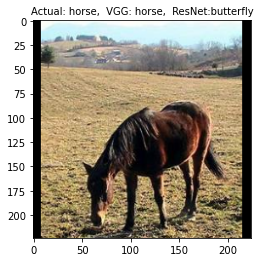

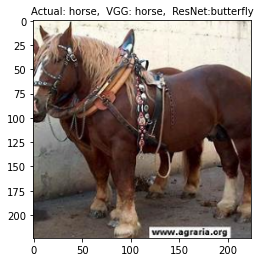

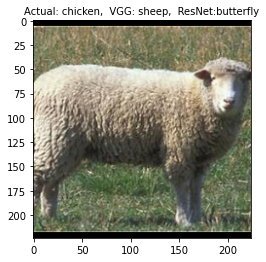

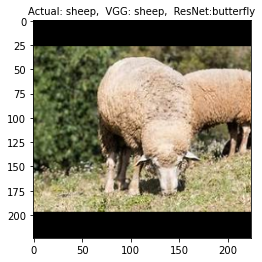

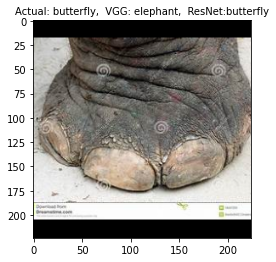

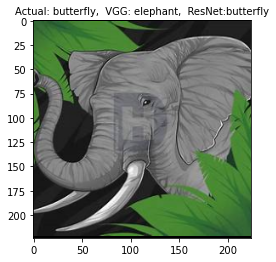

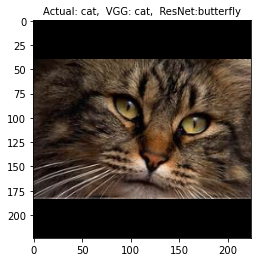

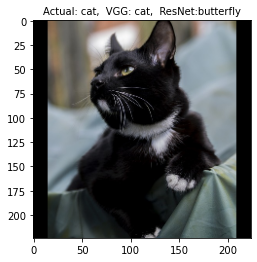

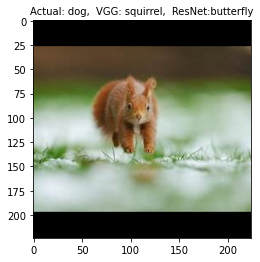

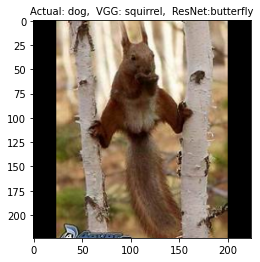

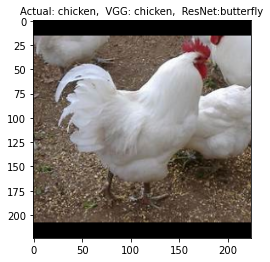

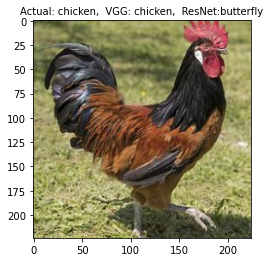

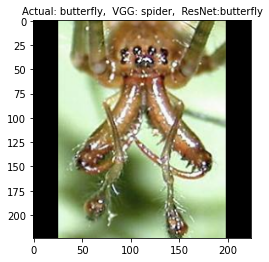

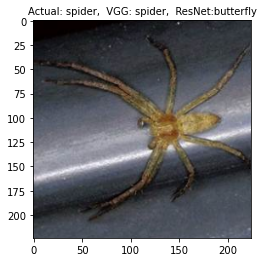

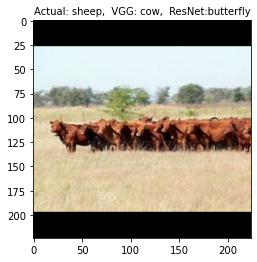

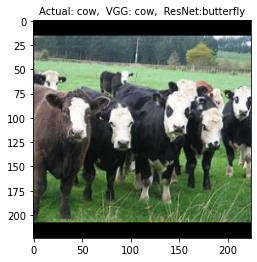

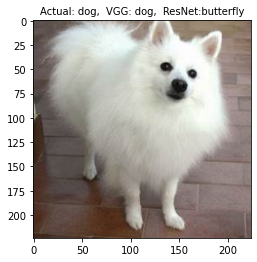

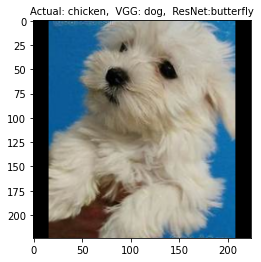

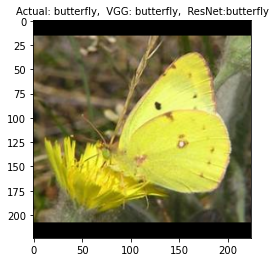

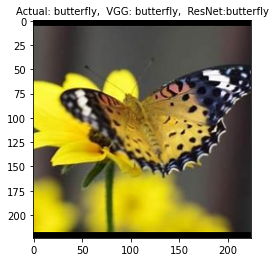

In [ ]:
actual_pred['category']=actual_pred['category'].astype('int')
for i in range(20):
    predict1= test_prediction1[i].argmax()
    predict2= test_prediction2[i].argmax()
    actual=actual_pred['category'][i]
    plt.imshow(test_images[i])
    plt.title("Actual: {1},  VGG: {0},  ResNet:{2}".format((animal_names[actual]),(animal_names[predict1]),(animal_names[predict2])), fontsize=10)
    plt.show()
